# Slicing the images

In [1]:
#import libraries:

from PIL import Image
import os
from numpy import asarray
from matplotlib import pyplot as plt
%matplotlib inline


# For images larger than limit of 178956970 pixels, we need to block the DecompressionBombError: 
Image.MAX_IMAGE_PIXELS = None 



In [20]:
#load image and convert to grayscale (alternative is 'RGB'):

img = Image.open('/Users/omeikar/Downloads/largetif_grayscale.jpg').convert('L')

In [21]:
print(img.size)

(24832, 24832)


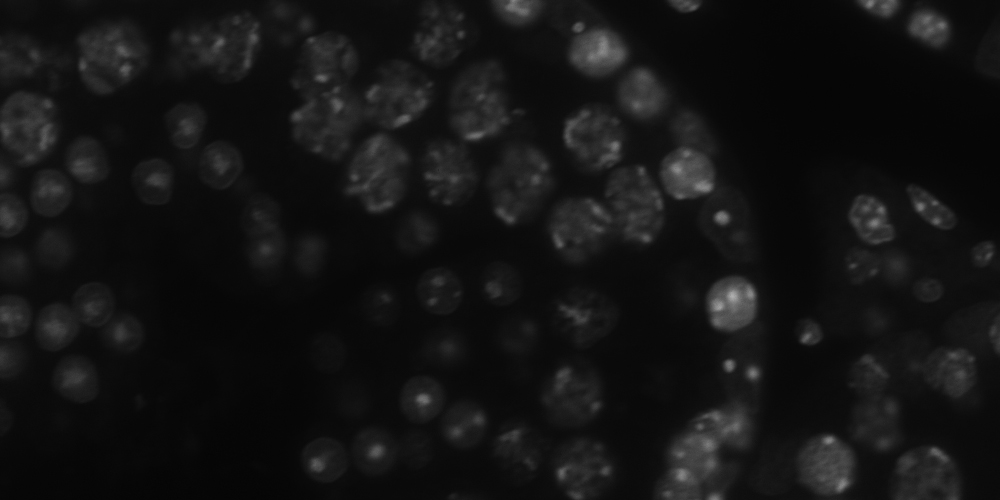

In [22]:
#lets look at the middle-frame in the image

box = (12000,12000,13000,12500) # upper right point and lower left point on the image
region = img.crop(box)
#region.show()
region

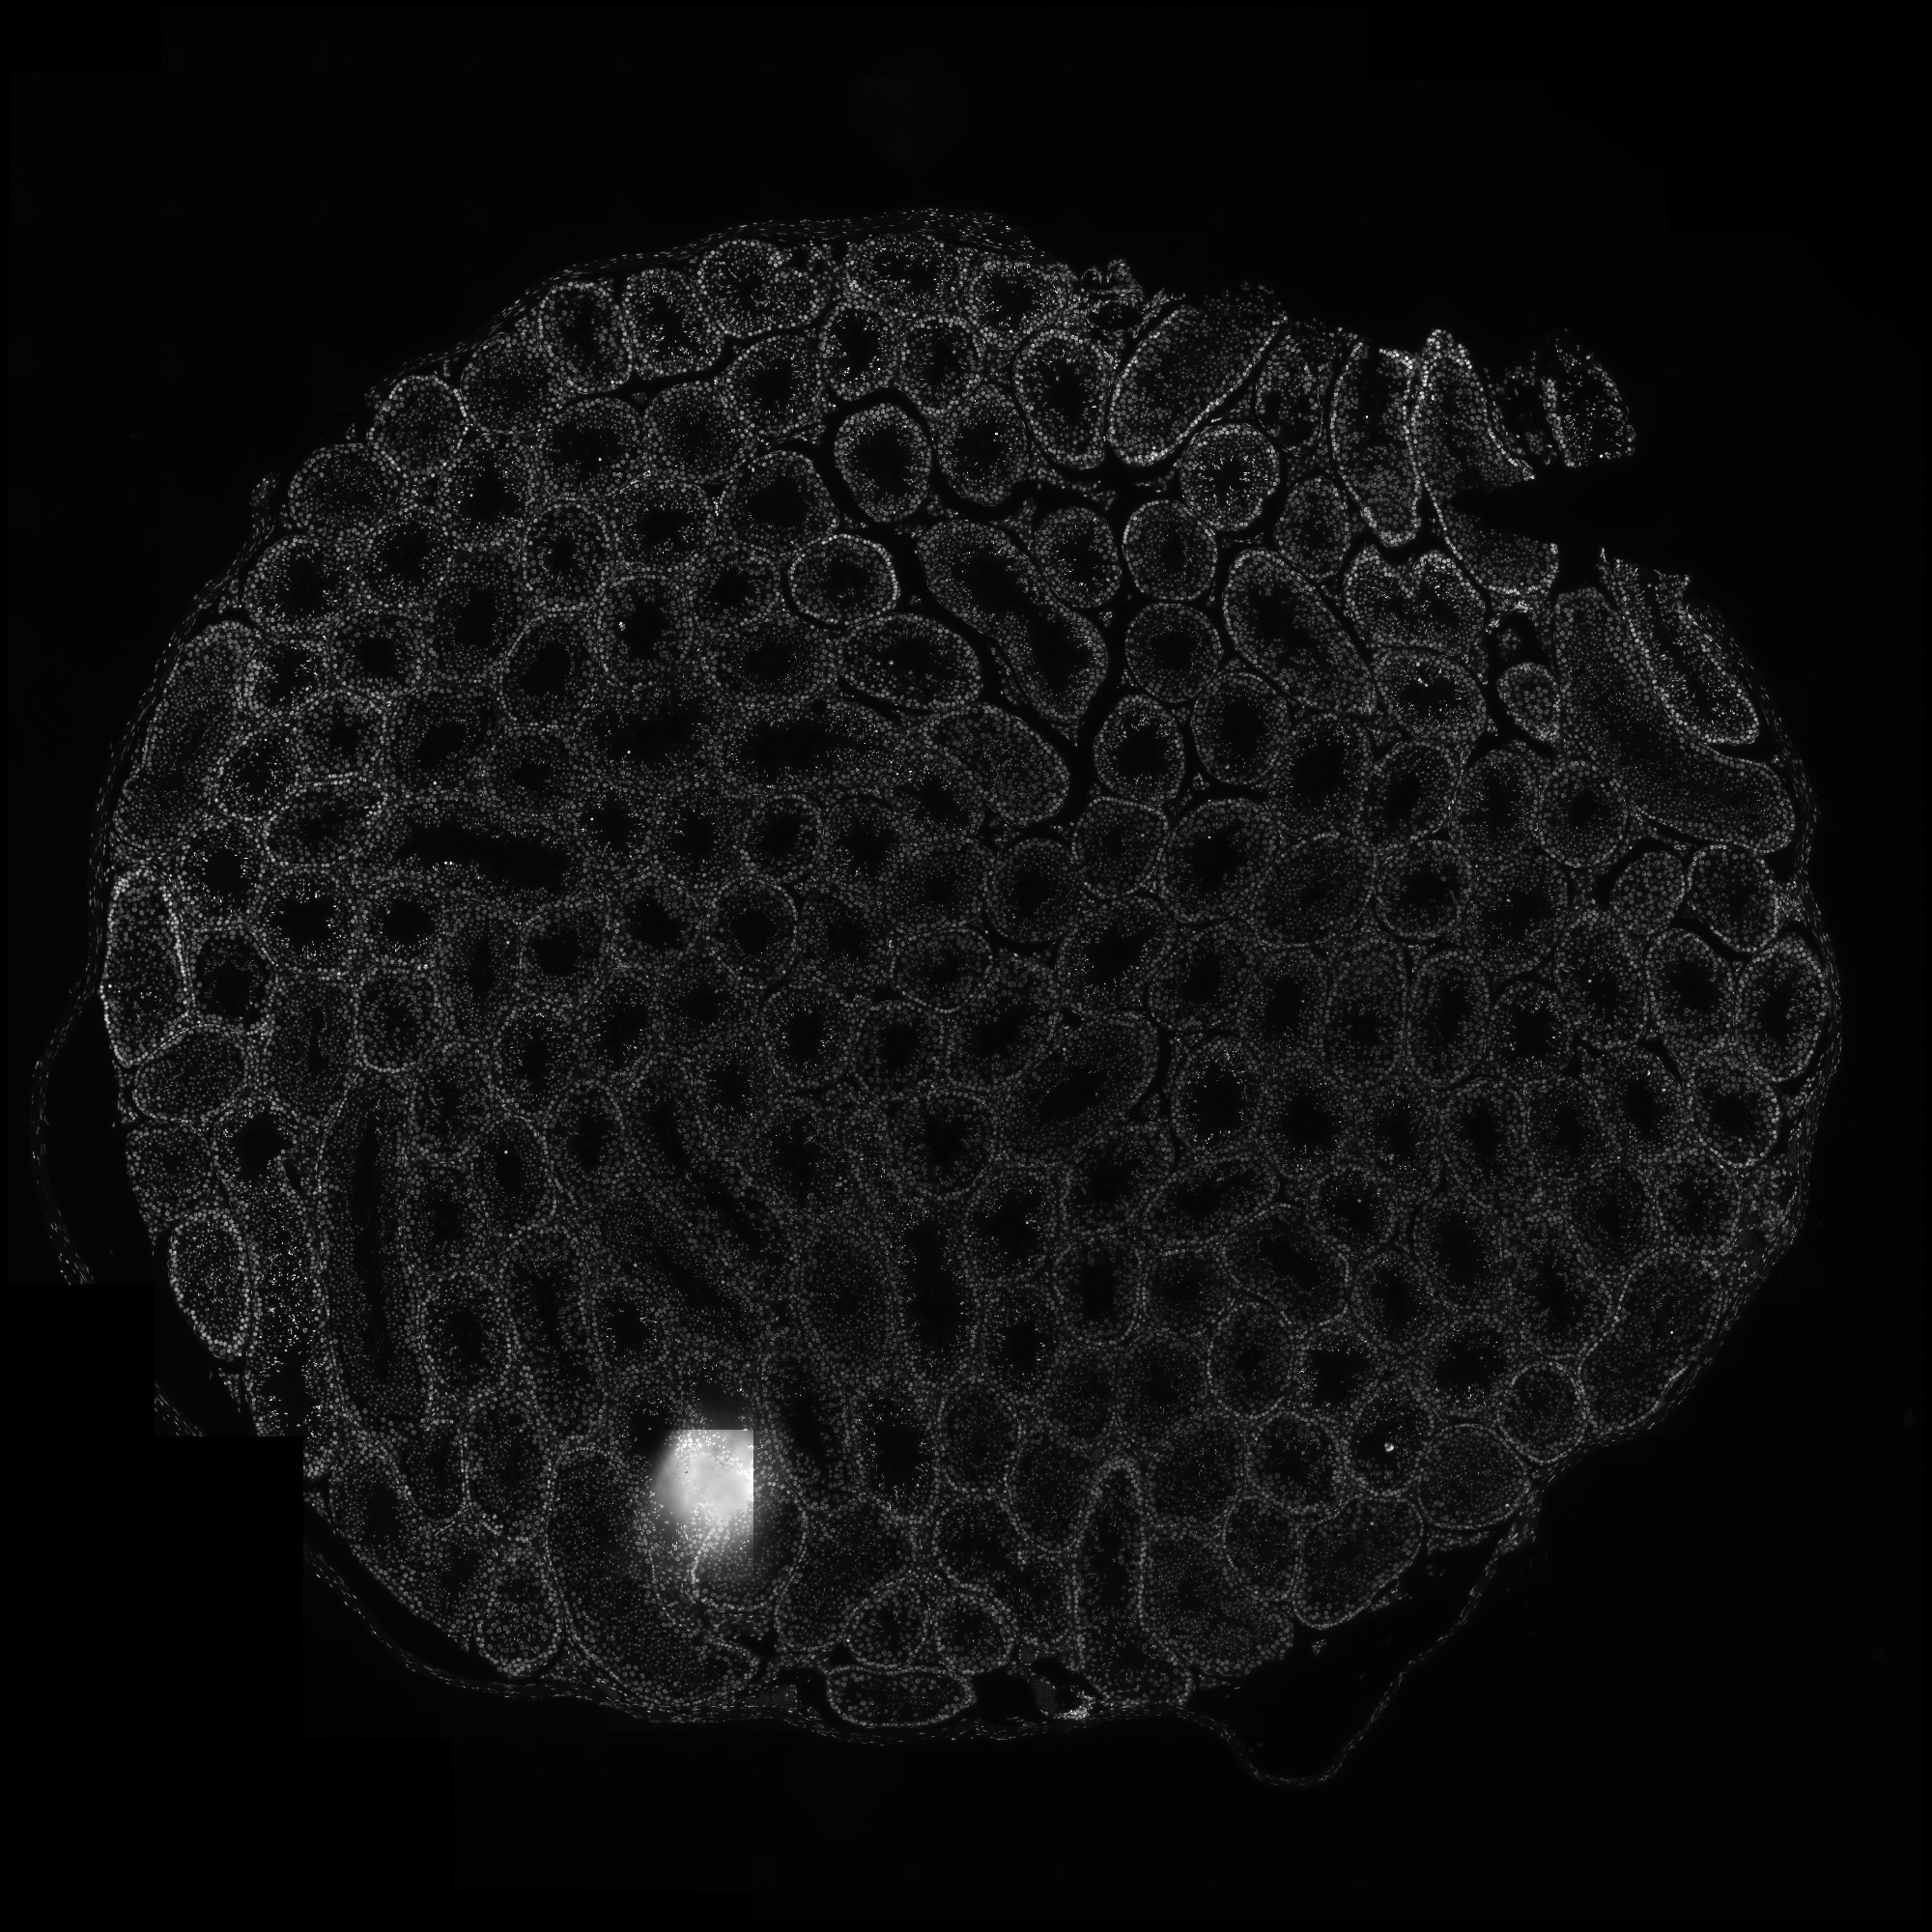

In [23]:
# lets make the image smaller to test the slicing
väiksem = img.resize((2000,2000))
väiksem

In [204]:
# code for slicing
# source: https://stackoverflow.com/questions/5953373/how-to-split-image-into-multiple-pieces-in-python


def slice_image(image, path, targetpath=path, chopsize= 2048, grayscale=True):
    
    row=0
    counter=0

    img = Image.open(os.path.join(path,image))
    if grayscale:
        img.convert('L')
        
    width, height = img.size
    
    #normalize image
    #img = normalize_img(img)
    
    # Save Chops of original image
    col=0
    for y0 in range(0, width, chopsize):
        col+=1
        row=0
        for x0 in range(0, height, chopsize):
            row +=1
            counter+=1
            box = (x0, y0,
                 x0+chopsize if x0+chopsize <  width else  width - 1,
                 y0+chopsize if y0+chopsize < height else height - 1)
            print('{}, [col:{} row:{}], x={:05d} y={:05d}'.format(image, box, col, row,x0, y0))
            img.crop(box).save('{}/slice_{}_col{}_row{}_nr{}.jpg'.format(targetpath, image.replace('.jpg',''), col, row, counter))
    print('({} images)'.format(counter))
    

#slice_image('01ann2_Merge.jpg',
#            '/Volumes/Install macOS Mojave/Ready_images/chosen', 
#            '/Volumes/Install macOS Mojave/Ready_images/chosen/slice_01ann2_DAPI', 10000)


In [218]:
#take files from folder, subject to slicing and put to new folder based on file names
#  01ann2_DAPI.jpg -> tükkideks ja samanimelisse folderisse "slices_01ann2_DAPI"

path = '/Volumes/Install macOS Mojave/Ready_images/chosen'

files = [e.name for e in os.scandir(path) if e.is_file() and os.path.splitext(e)[1]=='.jpg']
folders = [e.name for e in os.scandir(path) if not e.is_file()]

print(files)
print(folders)
count=0

for nr, file in enumerate(files):
    folder = 'slice_' + os.path.splitext(file)[0]
    if folder not in folders:
        count+=1
        #if count > 1: break
        print (file, path, os.path.join(path, folder))  #image, path, targetpath=path, chopsize= 2048
        
        os.mkdir(os.path.join(path, folder))
        slice_image(file, path, os.path.join(path, folder))
            
    

['01ann1_DAPI.jpg', '01ann1_Merge.jpg', '01ann2_DAPI.jpg', '01ann2_Merge.jpg', '01ann4_DAPI.jpg', '01ann4_Merge.jpg']
['slice_01ann1_DAPI', 'slice_01ann2_DAPI', 'slice_01ann2_Merge', 'slice_01ann4_DAPI', 'slice_01ann4_Merge']
01ann1_Merge.jpg /Volumes/Install macOS Mojave/Ready_images/chosen /Volumes/Install macOS Mojave/Ready_images/chosen/slice_01ann1_Merge
01ann1_Merge.jpg, [col:(0, 0, 2048, 2048) row:1], x=00001 y=00000
01ann1_Merge.jpg, [col:(2048, 0, 4096, 2048) row:1], x=00002 y=02048
01ann1_Merge.jpg, [col:(4096, 0, 6144, 2048) row:1], x=00003 y=04096
01ann1_Merge.jpg, [col:(6144, 0, 8192, 2048) row:1], x=00004 y=06144
01ann1_Merge.jpg, [col:(8192, 0, 10240, 2048) row:1], x=00005 y=08192
01ann1_Merge.jpg, [col:(10240, 0, 12288, 2048) row:1], x=00006 y=10240
01ann1_Merge.jpg, [col:(12288, 0, 14336, 2048) row:1], x=00007 y=12288
01ann1_Merge.jpg, [col:(14336, 0, 16384, 2048) row:1], x=00008 y=14336
01ann1_Merge.jpg, [col:(16384, 0, 18432, 2048) row:1], x=00009 y=16384
01ann1_Merg

01ann1_Merge.jpg, [col:(6144, 16384, 8192, 18432) row:9], x=00004 y=06144
01ann1_Merge.jpg, [col:(8192, 16384, 10240, 18432) row:9], x=00005 y=08192
01ann1_Merge.jpg, [col:(10240, 16384, 12288, 18432) row:9], x=00006 y=10240
01ann1_Merge.jpg, [col:(12288, 16384, 14336, 18432) row:9], x=00007 y=12288
01ann1_Merge.jpg, [col:(14336, 16384, 16384, 18432) row:9], x=00008 y=14336
01ann1_Merge.jpg, [col:(16384, 16384, 18432, 18432) row:9], x=00009 y=16384
01ann1_Merge.jpg, [col:(18432, 16384, 20480, 18432) row:9], x=00010 y=18432
01ann1_Merge.jpg, [col:(20480, 16384, 22528, 18432) row:9], x=00011 y=20480
01ann1_Merge.jpg, [col:(22528, 16384, 24576, 18432) row:9], x=00012 y=22528
01ann1_Merge.jpg, [col:(24576, 16384, 25087, 18432) row:9], x=00013 y=24576
01ann1_Merge.jpg, [col:(0, 18432, 2048, 20480) row:10], x=00001 y=00000
01ann1_Merge.jpg, [col:(2048, 18432, 4096, 20480) row:10], x=00002 y=02048
01ann1_Merge.jpg, [col:(4096, 18432, 6144, 20480) row:10], x=00003 y=04096
01ann1_Merge.jpg, [co

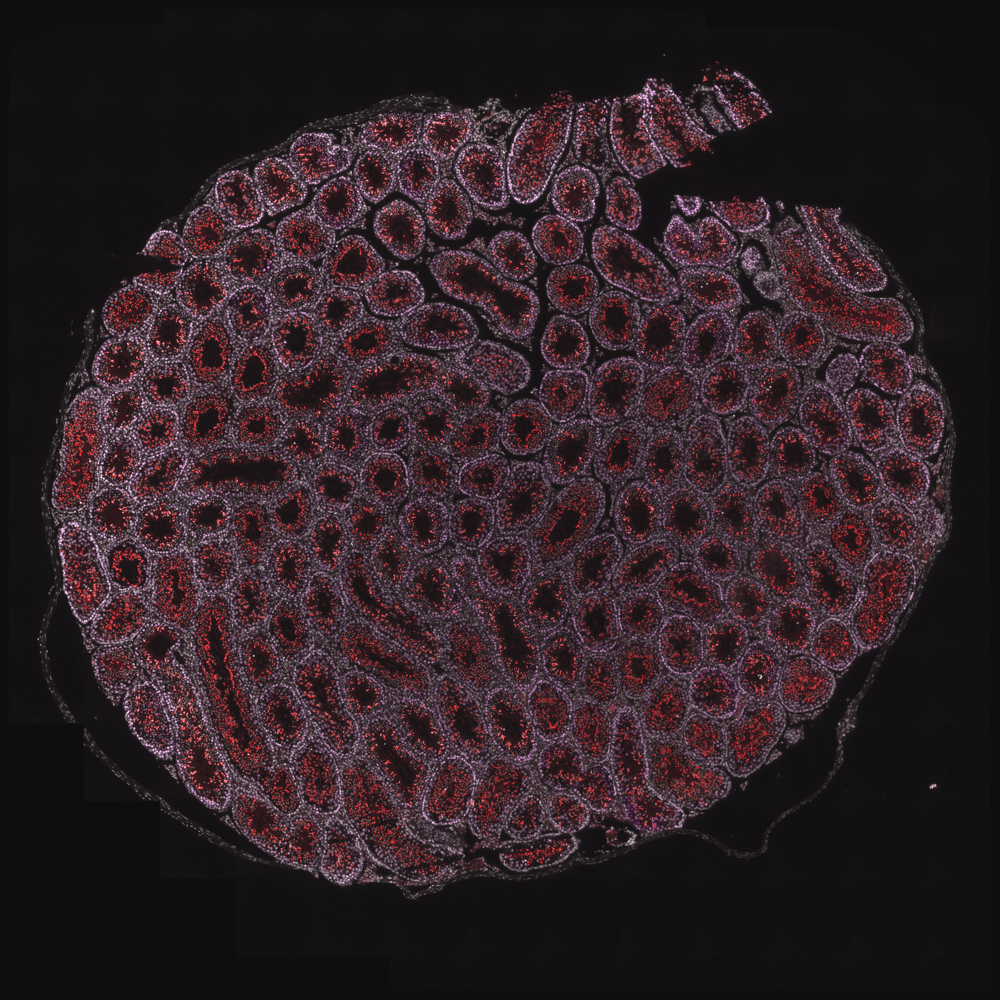

In [17]:
im = Image.open(os.path.join(root, name))
im.thumbnail((1000, 1000))
#im.save(outfile, "JPEG", quality=90)
im

In [4]:



'''
The example below loads the image and converts it into a NumPy array. 
The data type of the array is reported and the minimum and maximum pixels 
values across all three channels are then printed. Next, the array is converted 
to the float data type before the pixel values are normalized and the new range 
of pixel values is reported.
help from: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

'''
from PIL import Image

#loe fail sisse
#img = Image.open("<pilt>")
#img = img.convert('L') # kui teeme grayscale'ks

def normalize_img(image):
    print("input image:")
    print(image.format)
    print(image.mode)
    print(image.size)
    
    # convert to array
    pixels = asarray(image)
    # confirm pixel range is 0-255
    print('Data Type: %s' % pixels.dtype)
    print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    # convert from integers to floats
    pixels = pixels.astype('float32')
    
    # normalize 
    pixels = 2*(pixels - pixels.min()) / (pixels.max() - pixels.min()) - 1   # from -1 to 1
    #pixels /= 255.0
    
    # confirm the normalization
    print("output array:")
    print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    
    
    return pixels #numpy array of image
    

In [ ]:
#TODO: remove images that are not of right size and that have too low or too high valus (very close to -1 or 1)

In [5]:
# iga lõigatud pildi saab eraldi normliseerida:
test_path = '/Volumes/Install macOS Mojave/Ready_images/chosen/slice_01ann2_DAPI/'
test_img = 'slice_01ann2_DAPI_col3_row3_nr29.jpg'
fail_img = Image.open(os.path.join(test_path, test_img))

uusimg = normalize_img(fail_img)



input image:
JPEG
RGB
(2048, 2048)
Data Type: uint8
Min: 0.000, Max: 255.000
output array:
Min: -1.000, Max: 1.000


In [6]:
uusimg

array([[[-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       [[-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       [[-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ]],

       ...,

       [[-0.15294117, -0.15294117, -0.15294117],
        [-0